In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import statistics

<h1>Load the Data</h1>

<h3>(Note: 1 = yes, 0 = no)</h3>

In [3]:
csv_file_path = ""
df = pd.read_csv(csv_file_path)
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


<h1>Clean the Data</h1>

<h2>(Check for Multiple Rows for One Index/Person)</h2>

In [4]:
df.drop_duplicates(subset=["Index"], keep=False, inplace=True)
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


<i><b>Our # of rows has stayed the same so the dataframe has no duplicated rows for a single person</b></i>

<h2>(Check For Any NaN/Null Values In All The Columns)</h2>

In [5]:
df.dropna(inplace=True)
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


<i><b>Again, our # of rows has stayed the same, so the dataframe has no NaN values in any of the columns</b></i>

<h1>A Summary of the DataFrame</h1>

In [6]:
info = df.describe()

emp_count = info.iloc[1, 1] * info.iloc[0, 1]
ue_count = info.iloc[0, 1] - emp_count

default_count = info.iloc[1, 4] * info.iloc[0, 4]
payoff_count = info.iloc[0, 4] - default_count

print(f"Employed: {emp_count}\nUnemployed: {ue_count}\nDefaults: {default_count}\nPayoffs: {payoff_count}")

info

Employed: 7056.0
Unemployed: 2944.0
Defaults: 333.00000000000006
Payoffs: 9667.0


,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


<b>Bank Balances(USD): </b>$0 - $31,851 <br><br> <b>Salaries(USD): </b>$9,263 - $882,650 <br><br> <i>Most people in the data set seem to be employed, while only a smaller percentage default on their loans. Let us dig in further!</i>

<h1>Question 1: How Many Employed/UE People Default on their Loans?</h1>

<h2><i>Employed People</i></h2>

In [7]:
df_emp_and_default = df.loc[(df["Employed"] == 1.0) & (df["Defaulted?"] == 1.0)]

emp_defaults = df_emp_and_default["Employed"].count() / emp_count * 100

print("Employed Defaults: ", '%.2f' % emp_defaults, "%")

df_emp_and_default.describe()

Employed Defaults:  2.92 %


,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,206.000000,206.0,206.000000,206.000000,206.0
mean,5001.150485,1.0,20141.152427,487500.603495,1.0
std,2996.686986,0.0,3970.966677,123104.751380,0.0
min,207.000000,1.0,7828.800000,175969.680000,1.0
25%,2187.250000,1.0,17768.490000,416664.900000,1.0
50%,4951.000000,1.0,20518.980000,483368.700000,1.0
75%,7634.750000,1.0,22949.130000,586460.250000,1.0
max,9979.000000,1.0,29988.240000,797597.520000,1.0


<i><b>Answer:</b> 206 employed people default on their loans. Of the total 7,056 employed, <b>2.92%</b> default on their loans</i>

<h2><i>Unemployed People</i></h2>

In [8]:
df_ue_and_default = df.loc[(df["Employed"] == 0) & (df["Defaulted?"] == 1)]

ue_defaults = df_ue_and_default["Employed"].count() / ue_count * 100

print("UE'd Default: ", '%.2f' % ue_defaults, "%")

df_ue_and_default.describe()

UE'd Default:  4.31 %


,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,127.000000,127.0,127.000000,127.000000,127.0
mean,4790.039370,0.0,22324.546772,218922.098268,1.0
std,2793.551098,0.0,3944.821339,51654.155063,0.0
min,137.000000,0.0,12158.640000,115965.480000,1.0
25%,2298.000000,0.0,19651.080000,182895.180000,1.0
50%,4591.000000,0.0,22671.960000,216253.320000,1.0
75%,7031.000000,0.0,25323.360000,249707.400000,1.0
max,9922.000000,0.0,31851.840000,393132.600000,1.0


<i><b>Answer:</b> 127 unemployed people default on their loans. Of the total 2,944 unemployed, <b>4.3%</b> default on their loans</i>

<h1>Question 2: What are the General Loan Default & Employment Trends for Bank Balance? For Annual Salary?</h1>

<h2><i>Bank Balance and Defaults</i></h2>

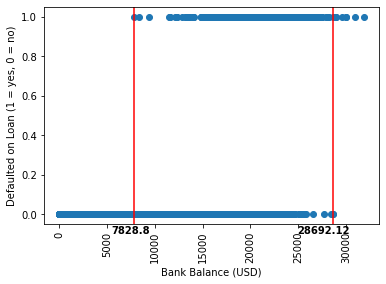

In [9]:
plt.scatter(df["Bank Balance"], df["Defaulted?"])
plt.xticks(rotation=90)
plt.axvline(x=df.loc[df["Defaulted?"] == 1]["Bank Balance"].min(), color="red", label="line") # Lower bound of bank balances for those who defaulted
plt.axvline(x=df.loc[df["Defaulted?"] == 0]["Bank Balance"].max(), color="red") # Upper bound of bank balances for those who fully payed off
plt.figtext(x=0.28, y=0.092, s=str(df.loc[df["Defaulted?"] == 1]["Bank Balance"].min()), fontweight="bold")
plt.figtext(x=0.71, y=0.092, s=str(df.loc[df["Defaulted?"] == 0]["Bank Balance"].max()), fontweight="bold")
plt.xlabel("Bank Balance (USD)")
plt.ylabel("Defaulted on Loan (1 = yes, 0 = no)")
plt.show()

<i><b>Answer:</b> A Bank Balance below \$7,828.80 assures a full payoff of the loan. A Bank Balance above \$28,692.12 assures a default on the loan.</i><br><br>

<b>Hypothesis: If people have more money in the bank, they are spending less of their income to pay off the loan, thereby defaulting on the loan.</b>

<h2><i>Annual Salary and Defaults</i></h2>

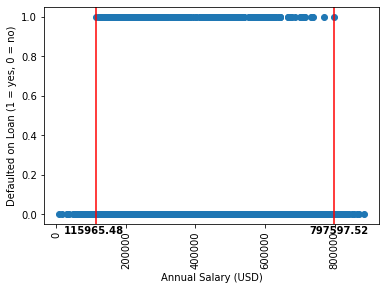

In [10]:
plt.scatter(df["Annual Salary"], df["Defaulted?"])
plt.xticks(rotation=90)
plt.axvline(x=df.loc[df["Defaulted?"] == 1]["Annual Salary"].min(), color="red", label="line") # Lower bound of annual salary for those who defaulted
plt.axvline(x=df.loc[df["Defaulted?"] == 1]["Annual Salary"].max(), color="red") # Upper bound of annual salary for those who fully payed off
plt.figtext(x=0.17, y=0.092, s=str(df.loc[df["Defaulted?"] == 1]["Annual Salary"].min()), fontweight="bold")
plt.figtext(x=0.74, y=0.092, s=str(df.loc[df["Defaulted?"] == 1]["Annual Salary"].max()), fontweight="bold")
plt.xlabel("Annual Salary (USD)")
plt.ylabel("Defaulted on Loan (1 = yes, 0 = no)")
plt.show()

<i><b>Answer:</b> An Annual Salary below \$115,965.48 OR above \$797,597.52 assures a full payoff of the loan.</i><br><br>

<b>Hypothesis: If people have a low salary, they would take out a smaller, more conservative, loan that is easier to pay off. If they have a very high salary (close to \$1M), any loan will be also easier to pay off. However, if their salary is high, but below \$0.5M, they might take out a large, unaffordable, loan due to overconfidence that they can pay it off.</b>

<h2><i>Combining Annual Salary and Bank Balance with Employment and Default...</i></h2>

<b>Separating each of the 4 Sub-DF's into Training Set (90%) and Testing Set (10%)</b>

In [11]:
# emp/default & ue/default are already defined above
df_emp_and_payoff = df.loc[(df["Employed"] == 1.0) & (df["Defaulted?"] == 0.0)]
df_ue_and_payoff = df.loc[(df["Employed"] == 0.0) & (df["Defaulted?"] == 0.0)]

emp_default_size = int(df_emp_and_default.describe()["Index"]["count"])
emp_default_training = df_emp_and_default.iloc[range(int(emp_default_size * 0.9))]
emp_default_testing = df_emp_and_default.iloc[range(int(emp_default_size * 0.9) + 1, emp_default_size)]

emp_payoff_size = int(df_emp_and_payoff.describe()["Index"]["count"])
emp_payoff_training = df_emp_and_payoff.iloc[range(int(emp_payoff_size * 0.9))]
emp_payoff_testing = df_emp_and_payoff.iloc[range(int(emp_payoff_size * 0.9) + 1, emp_payoff_size)]

ue_default_size = int(df_ue_and_default.describe()["Index"]["count"])
ue_default_training = df_ue_and_default.iloc[range(int(ue_default_size * 0.9))]
ue_default_testing = df_ue_and_default.iloc[range(int(ue_default_size * 0.9) + 1, ue_default_size)]

ue_payoff_size = int(df_ue_and_payoff.describe()["Index"]["count"])
ue_payoff_training = df_ue_and_payoff.iloc[range(int(ue_payoff_size * 0.9))]
ue_payoff_testing = df_ue_and_payoff.iloc[range(int(ue_payoff_size * 0.9) + 1, ue_payoff_size)]

<b>Plot the Training Set ONLY</b>

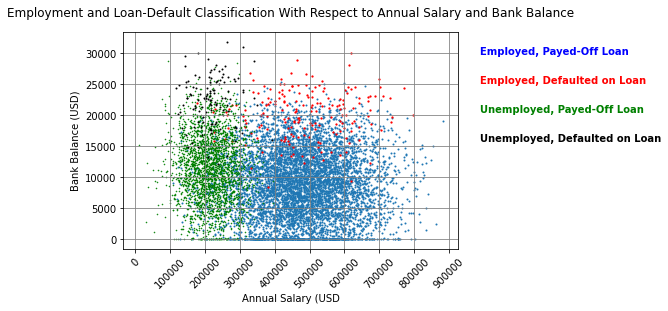

In [13]:
plt.xticks(ticks=range(0, 1000000, 100000), rotation=45)
plt.grid(b=True, axis="both", color="gray")

plt.scatter(emp_payoff_training["Annual Salary"], emp_payoff_training["Bank Balance"], s=1) # Employed, Payed off loan

plt.scatter(emp_default_training["Annual Salary"], emp_default_training["Bank Balance"], s=1.5, color="red") # Employed, Default on loan

plt.scatter(ue_payoff_training["Annual Salary"], ue_payoff_training["Bank Balance"], s=0.3, color="green") # Unemployed, Payed off loan

plt.scatter(ue_default_training["Annual Salary"], ue_default_training["Bank Balance"], s=1, color="black") # Unemployed, Default on loan

plt.xlabel("Annual Salary (USD")
plt.ylabel("Bank Balance (USD)")

plt.figtext(0.95, 0.8, "Employed, Payed-Off Loan", color="blue", fontweight="bold")
plt.figtext(0.95, 0.7, "Employed, Defaulted on Loan", color="red", fontweight="bold")
plt.figtext(0.95, 0.6, "Unemployed, Payed-Off Loan", color="green", fontweight="bold")
plt.figtext(0.95, 0.5, "Unemployed, Defaulted on Loan", color="black", fontweight="bold")

plt.title("Employment and Loan-Default Classification With Respect to Annual Salary and Bank Balance", pad=15.0)

plt.show()

<h3>Basic Classification</h3><br><br>
<i><b>Employed, Default:</b> An annual salary roughly between $300-700K, a bank balance roughly between $15-25K. </i><br> 
<i><b>Employed, Payed-Off:</b> An annual salary roughly between $300-700K, a bank balance roughly between $0-20K. </i><br> 
<i><b>Unmployed, Default:</b> An annual salary roughly between $150-300K, a bank balance roughly between $17-27K. </i><br> 
<i><b>Unemployed, Payed-Off:</b> An annual salary roughly between $150-300K, a bank balance roughly between $0-20K. </i><br> 

<h3>Key Oberservations:</h3><br>
<li>Employed people tend to share similar annual salaries regardless of if they default on their loans or not (the same goes for unemployed people).</li>
<li>Employed people have a wide range of annual salaries, while unemployed people typically have salaries below $300K</li><br><br>
<li>Defaulting people tend to share similar bank balances regardless of if they are employed or not (the same goes for those who pay-off their loans).</li>
<li>Those who default on their loans typically have larger bank balances upward of $10K, while those who pay off their loans have a much wider range of bank balances.</li>
</i><br><br>
<h3>Annual Salaries can predict employment, Bank Balances can predict whether or not someone defaults on their loan.</h3>

<h1>Question 3: Can You PREDICT if Someone is Employed? If they will Default on their Loan?</h1>

<h2>Classify Using the K Nearest Neighbors (KNN) Method</h2>

Remarks: The number of employed vs unemployed & pay-offs vs defaults is not even in this dataset. Therefore, we must define a ratio for the two relationships so that we can undervalue the majority class in the prediction process. <br><br>Ex: if the number of employed people in the dataset is twice as that of unemployed people, each employed "vote" in the KNN method will hold only 0.5 weight (rather than the normal 1). 

<h3><i>Find the Ratio of Emp:UE and Payoff:Default</i></h3>

In [14]:
emp_to_ue_ratio = emp_count / ue_count
payoff_to_default_ratio = payoff_count / default_count

<h3><i>Split DF into its 4 sub-DF's (emp/payoff, emp/default, ue/payoff, ue/default)... This is already done above</i></h3>

<h3><i>Divide each Sub-DF into a Training Set (plot it) (90%) and Testing Set (10%)... This is already done above</i></h3>

<h3><i>Create one Total Training DF to represent all plotted points</i></h3>

In [15]:
frames = [emp_payoff_training, emp_default_training, ue_payoff_training, ue_default_training]
total_training_set = pd.concat(frames)

<h3><i>Find the Euclidean Distance Between any 2 Points/Rows</i></h3>

In [16]:
def find_dist(row1, row2):
    distance = 0.0
    dist_squared = ((row2["Annual Salary"] - row1["Annual Salary"]) ** 2) + ((row2["Bank Balance"] - row1["Bank Balance"]) ** 2)
    distance = sqrt(dist_squared)
    return distance 

<h3><i>Find the Nearest Neighbors for a Given Point/Row</i></h3>

In [26]:
def find_neighbors(dataframe, num_rows, new_row, k):
    distance_values = []
    for i in range(0, num_rows):
        distance = find_dist(dataframe.iloc[i], new_row)
        distance_values.append((dataframe.iloc[i], distance))
    distance_values.sort(key=lambda tup: tup[1])
    neighbors = []
    for i in range(k):
        neighbors.append(distance_values[i][0])
    return neighbors

<h3><i>Classify the New Point/Row Based on its Nearest Neighbors</i></h3>

In [18]:
def classify(dataframe, num_rows, new_row, k):
    neighbors = find_neighbors(dataframe, num_rows, new_row, k)
    employed = [row["Employed"] for row in neighbors]
    default = [row["Defaulted?"] for row in neighbors]

    emp_predict = -1
    default_predict = -1

    # Voting process to determine Employment
    emp_votes = 0
    ue_votes = 0
    for emp_val in employed:
        if (emp_val == 1.0):
            emp_votes += 1
        else:
            ue_votes += 1
    if ((emp_votes/emp_to_ue_ratio) > ue_votes):
        emp_predict = 1
    else:
        emp_predict = 0
    
    # Voting process to determine Loan Default
    payoff_votes = 0
    default_votes = 0
    for default_val in default:
        if (default_val == 1.0):
            default_votes += 1
        else:
            payoff_votes += 1
    if ((payoff_votes/payoff_to_default_ratio) > default_votes):
        default_predict = 0
    else:
        default_predict = 1

    return emp_predict, default_predict

<h3><i>Test Predictions Using the Emp. / Payoff Testing Set</i></h3>

In [24]:
i = 0
for index, row in emp_payoff_testing.iterrows():

    emp_predict, default_predict = classify(total_training_set, 8999, row, 7)

    print(("employed" if emp_predict == 1 else "unemployed"), ("employed" if row["Employed"] == 1 else "unemployed"))
    print(("default on loan" if default_predict == 1 else "pay-off loan"), ("default on loan" if row["Defaulted?"] == 1 else "pay-off loan"))
    print("------------------------")

    i += 1

employed employed
pay-off loan pay-off loan
------------------------
employed employed
pay-off loan pay-off loan
------------------------
employed employed
pay-off loan pay-off loan
------------------------
unemployed employed
pay-off loan pay-off loan
------------------------
employed employed
pay-off loan pay-off loan
------------------------
employed employed
default on loan pay-off loan
------------------------
unemployed employed
pay-off loan pay-off loan
------------------------
employed employed
pay-off loan pay-off loan
------------------------
employed employed
pay-off loan pay-off loan
------------------------
employed employed
pay-off loan pay-off loan
------------------------
employed employed
pay-off loan pay-off loan
------------------------
unemployed employed
pay-off loan pay-off loan
------------------------
unemployed employed
pay-off loan pay-off loan
------------------------
employed employed
pay-off loan pay-off loan
------------------------
employed employed
pay-o

KeyboardInterrupt: 

<b><i>Above, we tested the prediction model with the employed / payoff testing set and k=7. We tested with the first 275 rows of the set (not the complete set), and made 222 correct predictions. This is an 81% accuracy for k=7. In order to save time, we will test the prediction model with the first 20 rows of each test set. This is because we would have to test with a total testing set of 1,000 rows and 4 k-values - 4,000 rows - and would take over 3 hours. The impact of this decision is discussed later.</i></b>

In [25]:
i = 0
for index, row in emp_payoff_testing.iterrows():

    emp_predict, default_predict = classify(total_training_set, 8999, row, 7)

    print(("employed" if emp_predict == 1 else "unemployed"), ("employed" if row["Employed"] == 1 else "unemployed"))
    print(("default on loan" if default_predict == 1 else "pay-off loan"), ("default on loan" if row["Defaulted?"] == 1 else "pay-off loan"))
    print("------------------------")

    i += 1
    if (i == 20):
        break

employed employed
pay-off loan pay-off loan
------------------------
employed employed
pay-off loan pay-off loan
------------------------
employed employed
pay-off loan pay-off loan
------------------------
unemployed employed
pay-off loan pay-off loan
------------------------
employed employed
pay-off loan pay-off loan
------------------------
employed employed
default on loan pay-off loan
------------------------
unemployed employed
pay-off loan pay-off loan
------------------------
employed employed
pay-off loan pay-off loan
------------------------
employed employed
pay-off loan pay-off loan
------------------------
employed employed
pay-off loan pay-off loan
------------------------
employed employed
pay-off loan pay-off loan
------------------------
unemployed employed
pay-off loan pay-off loan
------------------------
unemployed employed
pay-off loan pay-off loan
------------------------
employed employed
pay-off loan pay-off loan
------------------------
employed employed
pay-o

<b><i>The accuracy of the predictions is roughly 75% at k=3, 75% at k=5, 70% at k=7, and 60% at k=9. Note: This is only on the first 20 testing rows.</i></b>

<h3><i>Test Predictions Using the Emp. / Default Testing Set</i></h3>

In [20]:
i = 0
for index, row in emp_default_testing.iterrows():

    emp_predict, default_predict = classify(total_training_set, 8999, row, 9)

    print(("employed" if emp_predict == 1 else "unemployed"), ("employed" if row["Employed"] == 1 else "unemployed"))
    print(("default on loan" if default_predict == 1 else "pay-off loan"), ("default on loan" if row["Defaulted?"] == 1 else "pay-off loan"))
    print("------------------------")

    i += 1
    if (i == 20):
        break

employed employed
default on loan default on loan
------------------------
unemployed employed
pay-off loan default on loan
------------------------
employed employed
default on loan default on loan
------------------------
employed employed
default on loan default on loan
------------------------
employed employed
default on loan default on loan
------------------------
employed employed
default on loan default on loan
------------------------
employed employed
default on loan default on loan
------------------------
unemployed employed
pay-off loan default on loan
------------------------
employed employed
pay-off loan default on loan
------------------------
employed employed
pay-off loan default on loan
------------------------
employed employed
default on loan default on loan
------------------------
employed employed
pay-off loan default on loan
------------------------
employed employed
default on loan default on loan
------------------------
employed employed
default on loan de

<b><i>The accuracy of the predictions is roughly 50% at k=3, 65% at k=5, 70% at k=7, and 65% at k=9. Note: This is only on the first 20 testing rows.</i></b>

<h3><i>Test Predictions Using the UE / Payoff Testing Set</i></h3>

In [21]:
i = 0
for index, row in ue_payoff_testing.iterrows():

    emp_predict, default_predict = classify(total_training_set, 8999, row, 9)

    print(("employed" if emp_predict == 1 else "unemployed"), ("employed" if row["Employed"] == 1 else "unemployed"))
    print(("default on loan" if default_predict == 1 else "pay-off loan"), ("default on loan" if row["Defaulted?"] == 1 else "pay-off loan"))
    print("------------------------")

    i += 1
    if (i == 20):
        break

unemployed unemployed
default on loan pay-off loan
------------------------
unemployed unemployed
pay-off loan pay-off loan
------------------------
unemployed unemployed
pay-off loan pay-off loan
------------------------
unemployed unemployed
pay-off loan pay-off loan
------------------------
unemployed unemployed
pay-off loan pay-off loan
------------------------
unemployed unemployed
pay-off loan pay-off loan
------------------------
unemployed unemployed
pay-off loan pay-off loan
------------------------
unemployed unemployed
default on loan pay-off loan
------------------------
unemployed unemployed
pay-off loan pay-off loan
------------------------
unemployed unemployed
pay-off loan pay-off loan
------------------------
unemployed unemployed
default on loan pay-off loan
------------------------
unemployed unemployed
pay-off loan pay-off loan
------------------------
unemployed unemployed
pay-off loan pay-off loan
------------------------
employed unemployed
default on loan pay-of

<b><i>The accuracy of the predictions is roughly 90% at k=3, 85% at k=5, 80% at k=7, and 75% at k=9. Note: This is only on the first 20 testing rows.</i></b>

<h3><i>Test Predictions Using the UE / Default Testing Set</i></h3>

In [22]:
# Note: there are only 12 rows in this testing set

for index, row in ue_default_testing.iterrows():

    emp_predict, default_predict = classify(total_training_set, 8999, row, 7)

    print(("employed" if emp_predict == 1 else "unemployed"), ("employed" if row["Employed"] == 1 else "unemployed"))
    print(("default on loan" if default_predict == 1 else "pay-off loan"), ("default on loan" if row["Defaulted?"] == 1 else "pay-off loan"))
    print("------------------------")

unemployed unemployed
default on loan default on loan
------------------------
unemployed unemployed
default on loan default on loan
------------------------
unemployed unemployed
default on loan default on loan
------------------------
unemployed unemployed
default on loan default on loan
------------------------
unemployed unemployed
pay-off loan default on loan
------------------------
unemployed unemployed
pay-off loan default on loan
------------------------
unemployed unemployed
default on loan default on loan
------------------------
unemployed unemployed
default on loan default on loan
------------------------
unemployed unemployed
pay-off loan default on loan
------------------------
unemployed unemployed
pay-off loan default on loan
------------------------
unemployed unemployed
default on loan default on loan
------------------------
unemployed unemployed
pay-off loan default on loan
------------------------


<b><i>The accuracy of the predictions is roughly 42% at k=3, 42% at k=5, 58% at k=7, and 58% at k=9. Note: This is only on the first 20 testing rows.</i></b>

<h2>Classification Accuracy Across All Testing Sets...<br><br>
64.25% at k=3<br>
66.75% at k=5<br>
69.50% at k=7 *<br>
64.50% at k=9
</h2><br><br>

<h4>As we can see, k=7 provides the greatest accuracy of about 70% in predicting both employment and loan defaults.</h4><br><br>

<h4>Please note that this 70% accuracy is from only testing with the first 20 rows of each test set. For instance, we tested with the employed / pay-off testing set twice - once with 275 rows and once with 20 rows. At k=7, the first test yielded 81% accuracy while the second only yielded 70% accuracy. Therefore, we can assume that the true accuracy of this model is greater than 70%.</h4><br><br>

<p>This prediction model has applications in both public and private sectors. Take an organization such as the Fed. Using a model such as the one above can allow the Fed to create income and bank balance "targets" that will create a desired unemployment ratio. This effectively guides monetary policy. Meanwhile, a bank could look at the income and bank balance of a loan applicant and use this model to assess the risk in giving this person a loan. If the bank already knows the applicant's employment status, the model could be adjusted to predict only default risk. The scatter plot above would become a 3-dimensional plot with employment on the z-axis. Therefore, all points would live on the plan z=0 or z=1. The same KNN process would occur, only now calculating distance with the 3D Euclidean formula. That being said, whether this would increase the accuracy of predicting loan defaultability is in question. Recall that the percentage of employed and unemployed people that default on their loans is very similar - 2.92% and 4.3% respectively. Therefore, once we properly undervalue the majority class, there is not a stark difference in loan defaults that presents itself because the ratio of loan defaults is similar regardless of employment. In other words, employment does not impact loan defaults.</p>